#### Biblotecas

In [1]:

from tensorflow import keras 
#from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import normalize
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import glob, os
import re
import PIL
from PIL import Image
import matplotlib.pyplot as plt
#import cv2

In [3]:
print(tf.__version__)

2.10.0


### Data

In [6]:
dirt=r'C:\Users\Igor Santos\\Documents\data\new\base\treino'

In [7]:
os.path.exists(dirt)

True

In [8]:
maxsize = 180,180
class_names = ['fertil', 'infertil']

In [9]:

dataf = []
datai=[]
#labels = []

os.chdir(dirt)
#for file in glob.glob("fertil/*.jpg"):
for file in glob.glob("fertil/*.jpg"):
    image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
    target_size= (maxsize))
    image=np.array(image)
    dataf.append(image)
    #labels.append(0)

print("Fertil: ",len(dataf))
#fer = len(dataf)

# #os.chdir(dir_teste+'/inf/')
for file in glob.glob("infertil/*.jpg"):
     image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
     target_size= (maxsize))
     image=np.array(image)
     datai.append(image)
    # labels.append(1)

inf = len(datai)
print("Infertil: ",inf)

imgf = np.array(dataf)
imgi = np.array(datai)
#label_test = np.array(labels)

Fertil:  4647
Infertil:  759


In [143]:
#print(os.chdir('new/base/treino'))

In [144]:
print(len(data),len(labels))

5406 5406


In [167]:
img_test = np.array(data)
label_test = np.array(labels)

In [168]:
img_test.shape

(5406, 180, 180, 3)

### Models

##### DenseNet

In [10]:
densenet = Sequential()

den_pretrained_model= tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

densenet.add(den_pretrained_model)

for layer in den_pretrained_model.layers:
        layer.trainable=False

29084464/29084464 [==============================] - 3s 0us/step


In [11]:
densenet.add(Flatten())
densenet.add(Dense(512, activation='relu'))
densenet.add(Dense(2, activation='softmax'))

In [13]:
densenet.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


##### IncepciontV3

In [5]:
'''
tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
'''

inception = Sequential()

inc_pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

inception.add(inc_pretrained_model)

for layer in inc_pretrained_model.layers:
        layer.trainable=False

ImportError: `load_weights` requires h5py package when loading weights from HDF5. Try installing h5py.

##### MobileNet

In [9]:
mobilenet = Sequential()

mob_pretrained_model= tf.keras.applications.MobileNet(include_top=False,
                   input_shape=(192,192,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

mobilenet.add(mob_pretrained_model)

for layer in mob_pretrained_model.layers:
        layer.trainable=False
        

17235968/17225924 [==============================] - 2s 0us/step


In [10]:
mobilenet.add(Flatten())
mobilenet.add(Dense(512, activation='relu'))
mobilenet.add(Dense(2, activation='softmax'))

In [11]:
mobilenet.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


C:\Users\Igor Santos\.conda\envs\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


##### Efficientnet

In [138]:
#import tensorflow.keras.efficientnet as efc
import efficientnet.tf.keras as efc

efficientnet = Sequential()

efc_pretrained_model= tf.keras.EfficientNetB4(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

efficientnet.add(efc_pretrained_model)

for layer in pretrained_model.layers:
        layer.trainable=False      

ModuleNotFoundError: No module named 'efficientnet'

##### Resnet101

In [134]:
resnet101 = Sequential()

res_pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet50.add(pretrained_model)

171450368/171446536 [==============================] - 31s 0us/step


ValueError: Input 0 of layer conv1_pad is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 2]

##### Resnet50 preteinad

In [1]:
resnet50 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet50.add(pretrained_model)

NameError: name 'Sequential' is not defined

In [8]:
resnet50.add(Flatten())
resnet50.add(Dense(512, activation='relu'))
resnet50.add(Dense(2, activation='softmax'))

In [9]:
resnet50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
resnet50.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


#### Data Aumentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


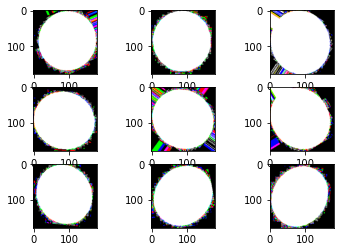

In [186]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90)#, width_shift_range = 0.1, 
                               #height_shift_range = 0.1, horizontal_flip = True)#,vertilcal_flip=True)
  # iteration on the training set

datagen.fit(X_train)

# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i], cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [155]:
# it_train = datagen.flow(X_train, y_train, batch_size = 32)
# it_train

In [33]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

In [16]:
#datagen = ImageDataGenerator(horizontal_flip=True)
#                         , rotation_range = 40,
#                              shear_range=0.2,#1
#                              width_shift_range=0.2,
#                             height_shift_range=0.2,
#                             horizontal_flip=True,#1
#                             vertical_flip=True)#1
#                              validation_split=0.15
  # iteration on the training set
#if (y_train==1):
#  it_train = datagen.flow(X_train, y_train, batch_size = batch_size

In [32]:
dg = dirt+"/infertil/gen/"
dg

'C:\\Users\\Igor Santos\\Desktop\\data\\new\\base\\treino/infertil/gen/'

In [37]:
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

for img in imgi:
    samples = expand_dims(img,0)
    i=0
    for batch in datagen.flow(samples, batch_size=32,save_to_dir=dg,save_prefix="zoom",
                              save_format="jpg"):
      i+=1
      if i>6:
        break

#### Data after augmantion

In [14]:
maxsize = 180,180
class_names = ['fertil', 'infertil']

In [15]:
dirt=r'C:\Users\Igor Santos\Documents\data\new\base\treino'

In [19]:

data = []
labels = []

os.chdir(dirt)
for file in glob.glob("fertil/gen/*.jpg"):
#for file in glob.glob("*.jpg"):
    if(len(data)<11000):
        image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
        target_size= (maxsize))
        image=np.array(image)
        data.append(image)
        labels.append(0)

print("Fertil: ",len(data))
fer = len(data)

# #os.chdir(dir_teste+'/inf/')
for file in glob.glob("infertil/gen/*.jpg"):
    if(len(data)<22000):
     image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
     target_size= (maxsize))
     image=np.array(image)
     data.append(image)
     labels.append(1)

inf = len(data)-fer
print("Infertil: ",inf)

data = np.array(data)
labels = np.array(labels)
              

Fertil:  11000
Infertil:  11000


In [23]:
labels.shape

(22000,)

#### Slip data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((15400, 180, 180, 3), (15400,))
((6600, 180, 180, 3), (6600,))


In [27]:
#Defining the parameters
batch_size= 64
epochs=100
learn_rate=.001
steps = X_train.shape[0]//batch_size

#### FIT

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=3)
early = EarlyStopping(monitor='val_accuracy',  patience=10, verbose=1, mode='auto')
lrr= ReduceLROnPlateau( monitor='val_accuracy', factor=.01, patience=5,  min_lr=1e-5)

In [29]:
hst = densenet.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs = epochs, 
                  validation_data =  (X_test, y_test),
                  callbacks = [lrr,early],
                  verbose=2)

Epoch 1/100
241/241 - 999s - loss: 0.8340 - accuracy: 0.8453 - val_loss: 0.2379 - val_accuracy: 0.9011 - lr: 0.0010 - 999s/epoch - 4s/step
Epoch 2/100
241/241 - 944s - loss: 0.2210 - accuracy: 0.9127 - val_loss: 0.2340 - val_accuracy: 0.9092 - lr: 0.0010 - 944s/epoch - 4s/step
Epoch 3/100
241/241 - 958s - loss: 0.2489 - accuracy: 0.9035 - val_loss: 0.1629 - val_accuracy: 0.9286 - lr: 0.0010 - 958s/epoch - 4s/step
Epoch 4/100
241/241 - 982s - loss: 0.2446 - accuracy: 0.9075 - val_loss: 0.3197 - val_accuracy: 0.8711 - lr: 0.0010 - 982s/epoch - 4s/step
Epoch 5/100
241/241 - 946s - loss: 0.1786 - accuracy: 0.9301 - val_loss: 0.2029 - val_accuracy: 0.9132 - lr: 0.0010 - 946s/epoch - 4s/step
Epoch 6/100
241/241 - 934s - loss: 0.1768 - accuracy: 0.9270 - val_loss: 0.2480 - val_accuracy: 0.8945 - lr: 0.0010 - 934s/epoch - 4s/step
Epoch 7/100
241/241 - 888s - loss: 0.1659 - accuracy: 0.9335 - val_loss: 0.2105 - val_accuracy: 0.9082 - lr: 0.0010 - 888s/epoch - 4s/step
Epoch 8/100
241/241 - 1009s

#### Visualize model accuracy

In [ ]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [ ]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

#### Save Model

In [30]:
dir_model= r'C:\Users\Igor Santos\Documents\data\model_densenet121'

In [31]:
densenet.save(dir_model+"\Densenet121_2264")
densenet.save(dir_model+"\Densenet121_2264.h5")

INFO:tensorflow:Assets written to: C:\Users\Igor Santos\Documents\data\model_densenet121\Densenet121_2264\assets


INFO:tensorflow:Assets written to: C:\Users\Igor Santos\Documents\data\model_densenet121\Densenet121_2264\assets


In [ ]:
#Save Model
from keras.models import load_model
resnet50.save("/content/drive/My Drive/Colab Notebooks/models/Resnet50tf.h5")
resnet50.save("/content/drive/My Drive/Colab Notebooks/models/Resnet50tf")
# AlexNet.save("/content/drive/My Drive/mascaras/Alexnet_ovos_aug.hdf5")

densenet.save(dir_model+"\Alexnet_ovos_aug")
# AlexNet.save(dir_model+"/Alexnet_ovos_aug.h5")

In [ ]:
#Save Model
from keras.models import load_model
# AlexNet.save("/content/drive/My Drive/mascaras/Alexnet_ovos_aug.h5")

In [ ]:
loaded_model = load_model("/content/drive/My Drive/Colab Notebooks/models/Resnet50-tl+aug")


In [ ]:
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
loss, accuracy = resnet50.evaluate(img_test, label_test)

47/47 [==============================] - 165s 3s/step - loss: 0.0392 - accuracy: 0.9860


In [ ]:
class_names = ['fertil', 'infertil']

In [ ]:
dir='/slz107'

#### Dataset Teste

In [ ]:
import os
#dir_teste = '/content/drive/My Drive/dataset/teste2/'
dir_teste = '/content/drive/My Drive/dataset/teste'+dir

In [ ]:
dir_teste

'/content/drive/My Drive/dataset/teste/slz107'

In [ ]:
maxsize= 180,180

In [ ]:
arq=[]
subd=[]
for diretorio, subpastas, arquivos in os.walk(dir_teste):
   subd.append(subpastas)
   for file in arquivos:
     #   print(fl)
     arq.append(file)

print(subd)
print(len(arq))

[['140057', '140055', '140109', '140051', '140106', '140124', '140046', '140044', '140101', '140115', '140159', '140223', '140226', '140148', '140138', '140131', '140129', '140146', '140150', '140141'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
168


In [ ]:
type(subd)

list

In [ ]:
len(subd[0])

20

In [ ]:
img_test  = []
label_test = []
i=0
while(i<20):
  path = dir_teste+"/"+subd[0][i]
  print(i)
  print(path)

  os.chdir(path)
  # for file in glob.glob("F/*.jpg"):
  # #for file in glob.glob("*.jpg"):
  #     image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
  #     target_size= (maxsize))
  #     image=np.array(image)
  #     img_test.append(image)
  #     label_test.append(0)

  # fer = len(img_test)
  # print("Fertil: ",fer)
  

  # #os.chdir(dir_teste+'/inf/')
  for file in glob.glob("*.jpg"):
      image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
      target_size= (maxsize))
      image=np.array(image)
      img_test.append(image)
      label_test.append(1)

  #inf = len(img_test)-fer
  #print("Fertil: ",len(img_test))

  #print("Infertil: ",inf)
  i+=1

img_test = np.array(img_test)
label_test = np.array(label_test)
              

0
/content/drive/My Drive/dataset/teste/slz107/140057
1
/content/drive/My Drive/dataset/teste/slz107/140055
2
/content/drive/My Drive/dataset/teste/slz107/140109
3
/content/drive/My Drive/dataset/teste/slz107/140051
4
/content/drive/My Drive/dataset/teste/slz107/140106
5
/content/drive/My Drive/dataset/teste/slz107/140124
6
/content/drive/My Drive/dataset/teste/slz107/140046
7
/content/drive/My Drive/dataset/teste/slz107/140044
8
/content/drive/My Drive/dataset/teste/slz107/140101
9
/content/drive/My Drive/dataset/teste/slz107/140115
10
/content/drive/My Drive/dataset/teste/slz107/140159
11
/content/drive/My Drive/dataset/teste/slz107/140223
12
/content/drive/My Drive/dataset/teste/slz107/140226
13
/content/drive/My Drive/dataset/teste/slz107/140148
14
/content/drive/My Drive/dataset/teste/slz107/140138
15
/content/drive/My Drive/dataset/teste/slz107/140131
16
/content/drive/My Drive/dataset/teste/slz107/140129
17
/content/drive/My Drive/dataset/teste/slz107/140146
18
/content/drive/My

In [ ]:
img_test  = []
label_test = []

path = dir_teste+"/"+subd[0][1]
print(path)

os.chdir(path)
#for file in glob.glob("F/*.jpg"):
for file in glob.glob("*.jpg"):
   image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
   target_size= (maxsize))
   image=np.array(image)
   img_test.append(image)
   label_test.append(1)

# print("Fertil: ",len(img_test))
# fer = len(img_test)

#   # #os.chdir(dir_teste+'/inf/')
# for file in glob.glob("I/*.jpg"):
#    image=tf.keras.preprocessing.image.load_img(file, color_mode='rgb', 
#    target_size= (maxsize))
#    image=np.array(image)
#    img_test.append(image)
#    label_test.append(1)

# inf = len(img_test)-fer
#   #print("Fertil: ",len(img_test))

# print("Infertil: ",inf)


img_test = np.array(img_test)
label_test = np.array(label_test)

/content/drive/My Drive/dataset/teste/slz107/140055


In [ ]:
print(len(img_test),len(label_test))
print(img_test.shape, label_test.shape)

53 53
(53, 180, 180, 3) (53,)


#### Prediction

In [ ]:
dir_model = "/content/drive/My Drive/Colab Notebooks/models/Resnet50tf.h5"
from keras.models import load_model
# from keras.models import model_from_json

In [ ]:
#Load Model

loaded_model = load_model(dir_model)

In [ ]:
# ###############
# # evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, accuracy = loaded_model.evaluate(img_test, label_test)
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
# resnet50.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss, accuracy = resnet50.evaluate(img_test, label_test)

14/14 [==============================] - 47s 3s/step - loss: 0.0294 - accuracy: 0.9885


In [ ]:
#y_pred =  resnet50.predict(img_test)

y_pred =  loaded_model.predict(img_test)
#y_pred = np.round(abs(pred)).astype('uint8')
y_true = label_test

In [ ]:
y_pred2=[]
for i in range(len(img_test)):
  y_pred2.append(np.around(y_pred[i][1]).astype('uint8'))

### Evaluate

In [ ]:
# ###############
# # evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, accuracy = loaded_model.evaluate(img_test, label_test)
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
# resnet50.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss, accuracy = resnet50.evaluate(img_test, label_test)

#y_pred =  resnet50.predict(img_test)

y_pred =  loaded_model.predict(img_test)
#y_pred = np.round(abs(pred)).astype('uint8')
y_true = label_test

y_pred2=[]
for i in range(len(img_test)):
  y_pred2.append(np.around(y_pred[i][1]).astype('uint8'))

1/1 [==============================] - 2s 2s/step - loss: 0.0832 - accuracy: 1.0000


In [1]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

NameError: name 'plt' is not defined

Confusion matrix, without normalization


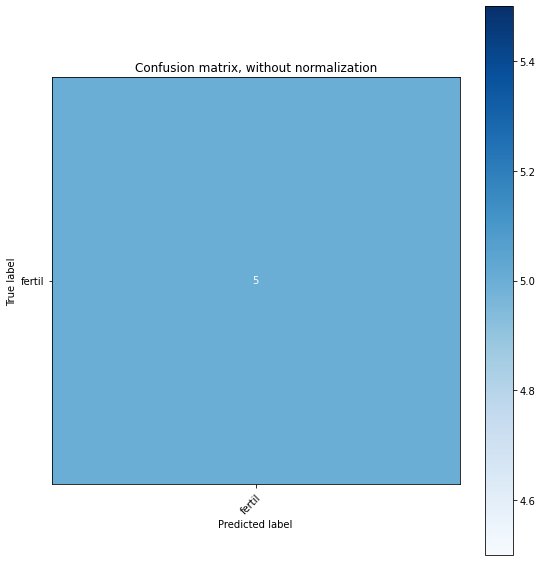

In [ ]:
#In the next step, we will predict the class labels for the test images using the trained AlexNet model.

#Making prediction
#y_pred=AlexNet.predict_classes(X_test)
#y_true=np.argmax(label_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred2)

#class_names=['fertil', 'infer', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred2, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


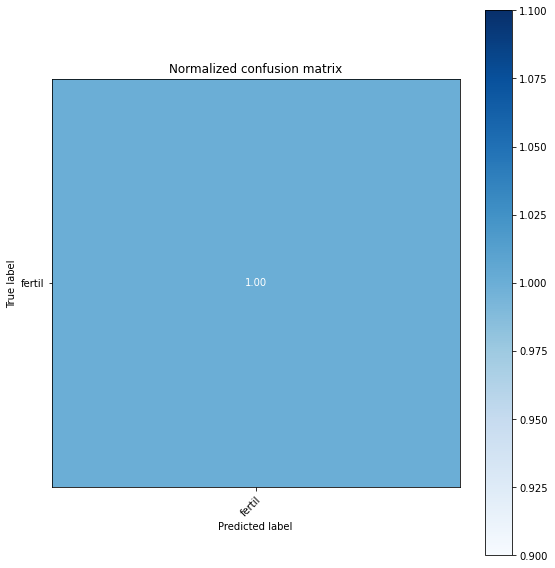

In [ ]:
# Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred2, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [ ]:
#Categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
# print("Fertil: ",len(img_test))
# print("Infertil: ",inf)

print ('\nAccuracy:', accuracy_score(y_true, y_pred2))
print ('F1 score:', f1_score(y_true , y_pred2))
print ('Recall:', recall_score(y_true, y_pred2))
print ('Precision:', precision_score(y_true, y_pred2))
print ('\n clasification report:\n', classification_report(y_true,y_pred2))
print ('\n confussion matrix:\n',confusion_matrix(y_true, y_pred2))


Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


 confussion matrix:
 [[5]]


### Display


In [ ]:
start,end = 24,36
pred = y_pred2[start:end]
img = img_test[start:end]

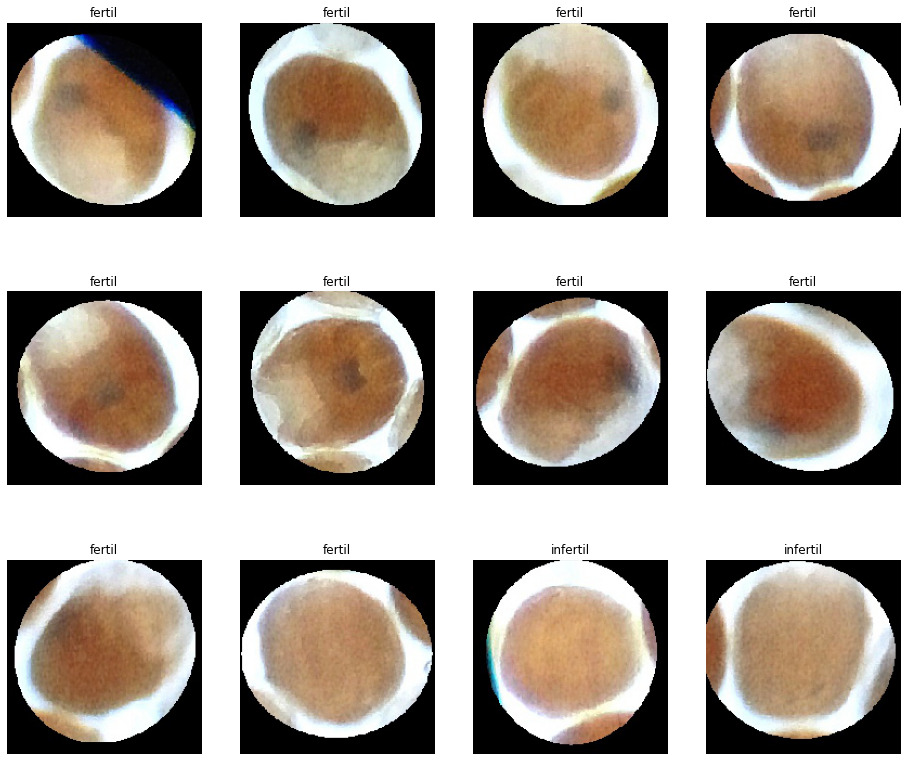

In [ ]:
plt.figure(figsize=(16,14))

for i in range(12):
  
    plt.subplot(3, 4, i+1)
    plt.axis('off')
    #plt.imshow(img_test[i])

    plt.imshow(img[i])
    plt.title(class_names[pred[i]])

### Evaluate

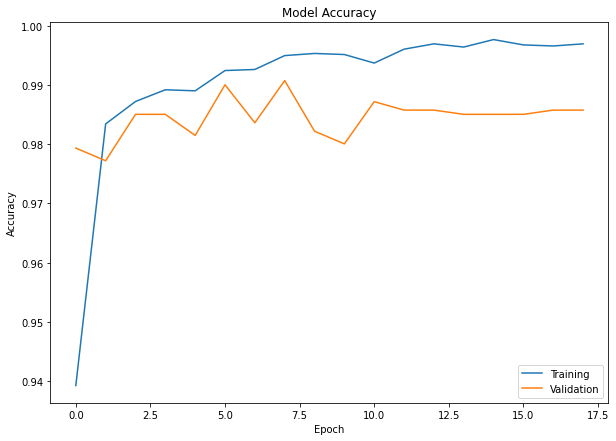

In [ ]:
#Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

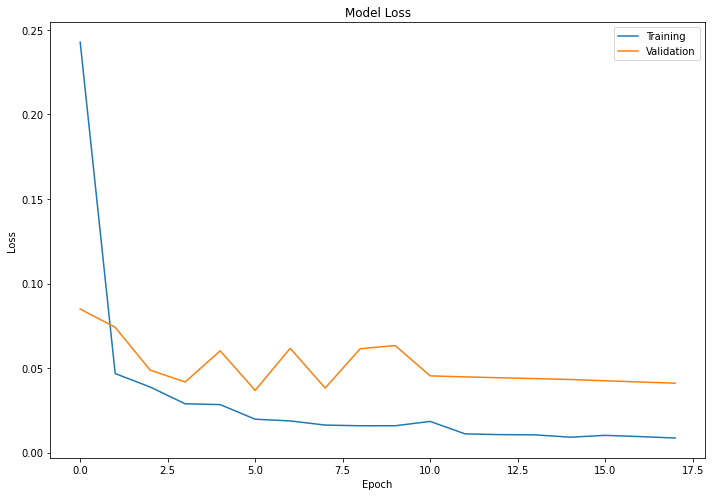

In [ ]:
#Loss

plt.figure(figsize=(10,7))
plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

In [ ]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break